# Statistical Foundations of Machine Learning Exam Project

*Milan Malfait*

*Master in Bioinformatics and Modeling*

*Université Libre de Bruxelles*

*Academic year 2017-2018*

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# 1. Problem 1.4: The Perceptron Learning Algorithm

The *Perceptron* was the first neural network proposed in the field of Artificial Intelligence. It can be used to represent a linear binary classifier and to learn the target function of a linearly separable dataset. The hypothesis set consists of a set of weights that are associated with the attributes of the input data. These weights define a hyperplane that separates the data in two classes. The Perceptron Learning Algorithm (PLA) is a form of *supervised learning*. It receives a training dataset with known target values as input and has to learn a set of weights that can correctly classify all of the training data. It achieves this by iteratively choosing a misclassified data point and adjusting the weights accordingly, until all data points are corrctly classified. This way, the PLA is able to search an infinte space of weight vectors with a finite number of steps and finding a solution.

In the following sections, the PLA and it behavior will be studied for various linearly separable datasets of varying sizes and dimensions. The datasets are artificially created so that the true target function is known. This way, the PLA hypothesis can be compared to the true target function to assess its accuracy.

## 1.1 Creating an artificial dataset

To test the PLA, artificial datasets are created. In general, a random target function will be generated, followed by a number of random data points that are classified accoding to the target function. This data can then be fed to the perceptron as input. In this first part, the dataset will be limited to 2-dimensional input vectors, i.e. data points with only 2 attributes. This has the advantage that the dataset can be easily visualized in a plot. In Section 1.4, this method is expanded to a 10-dimensional dataset.

### 1.1.1 Defining a random target function $f$

To test the PLA algorithm, an artificial dataset is first created using an arbitrary target function $f$. For this, the function `target(p1, p2, x)` is created. This function will take two points `p1` and `p2` as input and define the target function $f$ as the **straight line** that goes through these two points. The y-coordinate is then calculated for the given x, based on this linear equation.

In [3]:
def target(p1, p2, x):
    '''
    Defines a 2-dimensional target function based on two given points p1 and p2 as the straight line that goes 
    through them and returns the y-coordinate corresponding to a given x-coordinate
    p1, p2 should be 2-dimensionional, x should be a scalar
    '''
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])  # slope of the line
    b = p1[1] - m*p1[0]
    
    y = m*x + b  # output y from input x
    
    return y

### 1.1.2 Creating artificial datasets (2-dimensional)

This target function will then be used to separate the input data in two sets that will have a different label (the output $Y$). The input data consists of $N$ 2-dimensional vectors $\textbf{X}$ of the form $(x_1, x_2)$.

In the cell below, random data is generated and the output calculated. The output $Y$ is considered binary, being either $1$ or $-1$. Finally, the data points are plotted and labeled according to their output, as well as the target function.

In [4]:
def get_dataset(d, N):
    '''
    Generates an atrificial dataset that can be used for perceptron learning, in the form of a set of input
    vectors, their associated output and the target function that produced the output.
    
    Parameters:
    -----------
        * d : integer, dimension of the data input vectors X = (x1, x2, ..., xd)
        * N : integer, size of the dataset, i.e. the number of data points
        
    Returns:
    --------
        * X_arr : numpy array, N*d matrix containing the input vectors X
        * Y_arr : numpy array, N-dimensional vector containing the outputs associated with the input vectors
        * f : lambda function, the target function associated with the dataset
    '''
    space = [0, 1]  # range for the values of x1 and x2 of the input

    # Generating data; using a loop that ensures both positive and negative outputs are acquired
    while True:
        # Generate 2 random points (between 0 and 1) from which the target function will be defined
        p1 = np.random.uniform(space[0], space[1], 2)
        p2 = np.random.uniform(space[0], space[1], 2)
    
        # defining the target function
        f = lambda x: target(p1, p2, x)
    
        # Generate N random input vectors X, stored in a N*d array
        X_arr = np.random.uniform(space[0], space[1], [N, d])
    
        # Calculate outputs Y from each X based on target function, stored in N*1 array
        Y_arr = np.empty(N)
        
        for i in range(N):
            x1 = X_arr[i, 0]
            x2 = X_arr[i, 1]
            Y_arr[i] = np.sign(x2 - f(x1))
    
        # Check if there are both positive and negative outputs
        pos = np.argwhere(Y_arr > 0)
        neg = np.argwhere(Y_arr < 0)
        if len(pos) and len(neg):
            break
            
    return X_arr, Y_arr, f

#### Plotting the dataset

The code below provides a function to visualize the 2-dimensinal dataset in a plot containing the data points with labels correspondng to their classification and the target function.

In [5]:
# plot the dataset

def plot_linear_dataset(X, y, f=None):
    '''
    Plots a linearly separable dataset consisting of input vectors x (stored in matrix X) and output labels y.
    When working with an artificial dataset, the real target function can be provided to be included in the plot.
    '''
    fig, ax = plt.figure(figsize=(8, 8)), plt.axes()

    pos = np.argwhere(y > 0)
    neg = np.argwhere(y < 0)
    
    ax.plot(X[pos, 0], X[pos, 1], 'bP', linestyle='none', label='y = +1');  # datapoints with positive Y
    ax.plot(X[neg, 0], X[neg, 1], 'rv', linestyle='none', label='y = -1');  # datapoints with negative Y

    # plotting the target function f
    if f is not None:
        x = np.linspace(0, 1, 2) # 2 numbers between 0 and 1
        ax.plot(x, f(x), 'k-', label='Target function');

    ax.set_title('Artificial dataset');
    ax.set_xlabel(r'$x_1$');
    ax.set_ylabel(r'$x_2$');
    ax.legend(frameon=True, shadow=True, fancybox=True, loc='upper right', bbox_to_anchor=[1.4, 1]);
    ax.set_xlim(-0.02, 1.02);
    ax.set_ylim(-0.02, 1.02);

## 1.2 The Perceptron Learning Algorithm

### 1.2.1 The Perceptron hypothesis set

The Perceptron hypothesis set for an input vector $\textbf{X}$ can be written as:

$$ h(\textbf{X}) = \text{sign}\left(\left(\sum\limits_{i=1}^{d}w_i x_i\right) - \text{threshold}\right)$$

where $w_i$ are the weights corresponding to the different attributes $x_i$ of the input vector $\textbf{X}$. The threshold gives the minimum value that the input must reach to be classified as "positive". The $\text{sign}$ function returns $+1$ for positive and $-1$ for negative values.

The threshold can be replaced by a weight $w_0$ and an artificial coordinate $x_0 = 1$ can be introduced to obtain a more compact form of the hypothesis set:

$$ h(\textbf{X}) = \text{sign}\left(\sum\limits_{i=0}^{d}w_i x_i\right)$$

Or in vector form:

$$ h(\textbf{X}) = \text{sign}\left(\textbf{w}^T \textbf{X}\right)$$

where $\textbf{w}$ and $\textbf{X}$ are both considered as column vectors (so $\textbf{w}^T$ is a row vector).

### 1.2.2 The learning algorithm

Given a training set $(\textbf{X}_1, y_1), (\textbf{X}_2, y_2), ... , (\textbf{X}_N, y_N)$ of input vectors with their associated correct outputs $y$ (and that can be assumed to be linearly separable), the PLA will iteratively adjust the weights vector $\textbf{w}$ until it has succeeded to correctly classify all training points.

The perceptron is initiated with a random set of weights. At each iteration $t$ it will pick a **misclassified** point, i.e. a point $n$ for which:

$$ \text{sign}\left(\textbf{w}(t)^T \textbf{X}_n\right) ≠ y_n$$

The weights vector for the next iteration is then updated according to:

$$ \textbf{w}(t+1) = \textbf{w}(t) + y_n \textbf{X}_n $$

The algorithm repeats this process until all points have been correctly classified. The weights vector $\textbf{w}$ will then define a straight line that approximates the target function.

An optional parameter `max_iters` has been incorporated in this function. This allows to set a limit for the number of iterations the algorithm runs before stopping, which is necessary for the experiments performed in Part 2 of this Notebook.

In [6]:
def pla(training_in, training_out, max_iters=None):
    '''
    Finds the approximation of the unknown target function associated with the given training set according to
    the Perceptron Learning Algorithm.
    
    Parameters:
    -----------
        * training_in : numpy array, contains the input vectors of the training dataset
        * training_out : numpy array, contains the outputs associated with the corresponding input vectors
        * max_iters : int (optional), the maximum number of iterations that the algorithm will run (default None)
    
    Returns:
    --------
        * w : numpy array, vector containing the weights of the PLA after training
        * iters : integer, number of iterations before the PLA converged
        * all_weights : list, contains the history of weights from each iteration during learning
    '''
    training_in = np.array(training_in)
    training_out = np.array(training_out)
    
    assert np.shape(training_in)[0] == np.shape(training_out)[0], \
            "Training input and output have incompatible dimensions."
    
    # Introduce the x0 dimension (x0 = 1), store all input vectors in a N*d matrix
    X_matrix = np.hstack((np.ones((len(training_in), 1)), training_in))
    
    # Initialize d-dimensional weights vector to 0
    w = np.zeros(np.shape(X_matrix)[1])
    all_weights = [w]  # list to store all weights generated during training (used for animation)
    
    iters = 0                          # current number of iterations
    predictions = np.sign(X_matrix@w)  # current output of the perceptron, as a N-dimensional vector
    
    while any(predictions != training_out):
        iters += 1  # update number of iterations
        if max_iters is not None:
            if iters >= max_iters:
                print("PLA did not converge after %s iterations" %(iters))
                break
        
        misclassified = np.argwhere(predictions != training_out)     # indexes of misclassified data (N*1 array)
        i = misclassified[np.random.randint(len(misclassified)), 0]  # choose a random index
        yn = training_out[i]
        xn = X_matrix[i]
        
        w = w + yn*xn                       # update weights vector
        all_weights.append(w)               # add weights vector to list
        predictions = np.sign(X_matrix@w)   # make new predictions
        
    return w, iters, all_weights

### 1.2.4 Time to convergence

Here, the number of iterations the PLA takes to converge is studied. In order to perform a statistical analysis the algorithm is run 1000 times and the number of iterations from each simulation is stored.

In [7]:
def pla_convergence(training_in, training_out):
    '''
    Performs 1000 PLA simulations on the same training dataset and returns an array containing the number of
    iterations each simulation took to converge.
    
    Parameters:
    -----------
        * training_in : numpy array, contains the input vectors of the training dataset
        * training_out : numpy array, contains the outputs associated with the corresponding input vectors
        
    Returns:
    --------
        * iterations : numpy array, contains the number of iterations from each simulation
    '''
    iterations = []
    
    for _ in range(1000):
        _ , iters, _ = pla(training_in, training_out)
        iterations.append(iters)
        
    iterations = np.array(iterations)
    
    return iterations

## 1.3 EXPERIMENTS: 2-dimensional datasets

### 1.3.1 Creating linearly separable training datasets (2-dimensional) 

$\textbf{x}_n \in {\rm I\!R}^2$

Dataset sizes: 20, 100 and 1000.

In [16]:
d = 2                   # number of dimensions for the input data
sizes = [20, 100, 1000] # dataset sizes
datasets = {}           # dictionary to store datasets

for s in sizes:
    datasets['size = %s' %(s)] = get_dataset(d, s)

# include a second dataset of size 20 for problem 1.4 (c), for comparison
datasets['size = 20(bis)'] = get_dataset(d, 20)

For illustration, the raw data from the dataset with size 20 is shown below.

In [17]:
print("Training set input vectors:\n", datasets['size = 20'][0])
print()
print("Training set output:\n", datasets['size = 20'][1])

Training set input vectors:
 [[0.28565188 0.78287203]
 [0.35044866 0.73262375]
 [0.10213834 0.56207075]
 [0.93992771 0.68814147]
 [0.6549637  0.89151298]
 [0.80314107 0.25998663]
 [0.6836812  0.01468673]
 [0.23593824 0.7205182 ]
 [0.0470323  0.51096929]
 [0.57131502 0.55504116]
 [0.17396348 0.05124324]
 [0.00474606 0.41487827]
 [0.93441477 0.35546444]
 [0.02781731 0.27264452]
 [0.56802381 0.48355404]
 [0.80033509 0.51725064]
 [0.34715796 0.3082179 ]
 [0.54300324 0.73123701]
 [0.69175688 0.81178155]
 [0.31578132 0.62310752]]

Training set output:
 [ 1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1.
  1.  1.]


### 1.3.2 Training and plotting the PLA hypothesis for the different datasets

The results shown below correspond to parts (a), (b), (c), (d) and (e) from Problem 1.4.

The line $w_1x_1 + w_2x_2 + w_0 = 0$ defines the line (in 2-dimensional space) that approximates the target function according to the PLA. This can also be written as:

$$ x_2 = -\frac{w_1}{w_2} x_1 - \frac{w_0}{w_2} $$

and used as the equation describing the line in the $(x_1, x_2)$ plane.

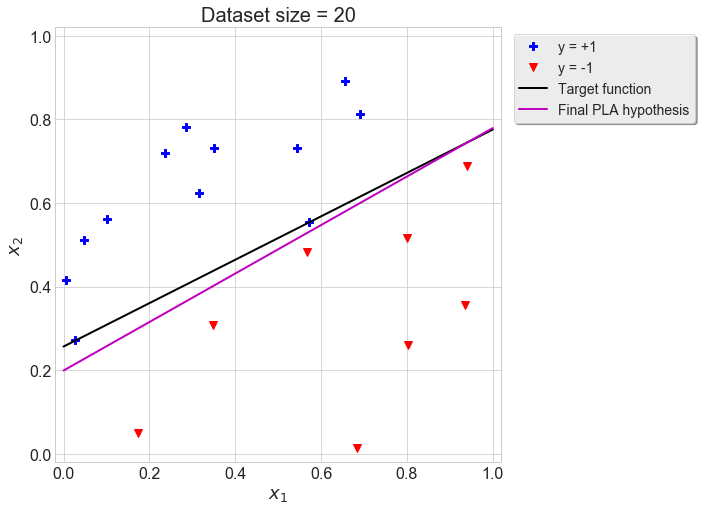

Iterations: 45


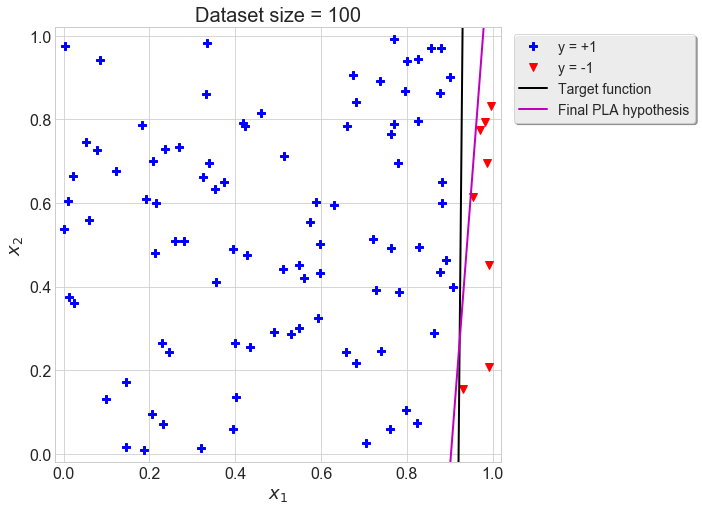

Iterations: 79


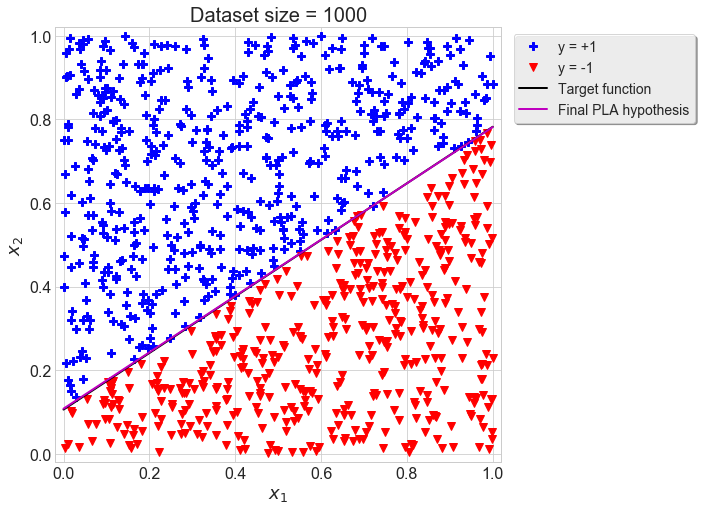

Iterations: 1389


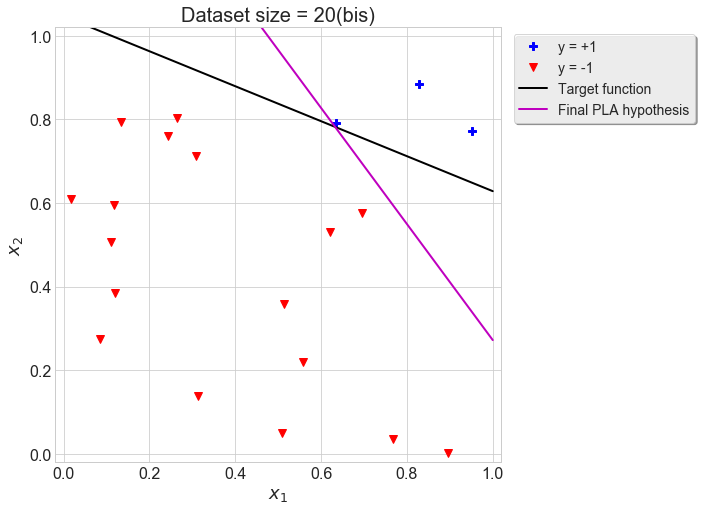

Iterations: 25


In [18]:
for key, data in datasets.items():
    X, Y, f = data
    w, iters, _ = pla(X, Y)
    # plot the dataset
    plot_linear_dataset(X, Y, f)
    # plotting the PLA hypothesis
    g = lambda x: -(w[1]/w[2])*x - (w[0]/w[2])
    x = np.linspace(0, 1, 2)
    plt.plot(x, g(x), 'm-', label='Final PLA hypothesis')
    plt.legend(frameon=True, shadow=True, fancybox=True, loc='upper right', bbox_to_anchor=[1.45, 1])
    plt.title('Dataset ' + key)
    plt.show()
    # report number of iterations after convergence of PLA
    print("Iterations:", iters)

### 1.3.3 Time to convergence

In this section, the number of iterations until convergence required by the PLA is studied for the different dataset sizes shown above (not explicitly asked in Problem 1.4). For each dataset, 1000 runs of the PLA are run and the number of iterations from each simulation are stored to use for statistical analysis. 

**WARNING:** The code below can take while to run (approx. **50 seconds**)

In [19]:
%%time
X_20, Y_20 = datasets['size = 20'][0], datasets['size = 20'][1]
X_100, Y_100 = datasets['size = 100'][0], datasets['size = 100'][1]
X_1000, Y_1000 = datasets['size = 1000'][0], datasets['size = 1000'][1]

iterations_20 = pla_convergence(X_20, Y_20)
iterations_100 = pla_convergence(X_100, Y_100)
iterations_1000 = pla_convergence(X_1000, Y_1000)

CPU times: user 30.5 s, sys: 288 ms, total: 30.8 s
Wall time: 31.3 s


Histograms and boxplots of the number of iterations are plotted for each dataset size.

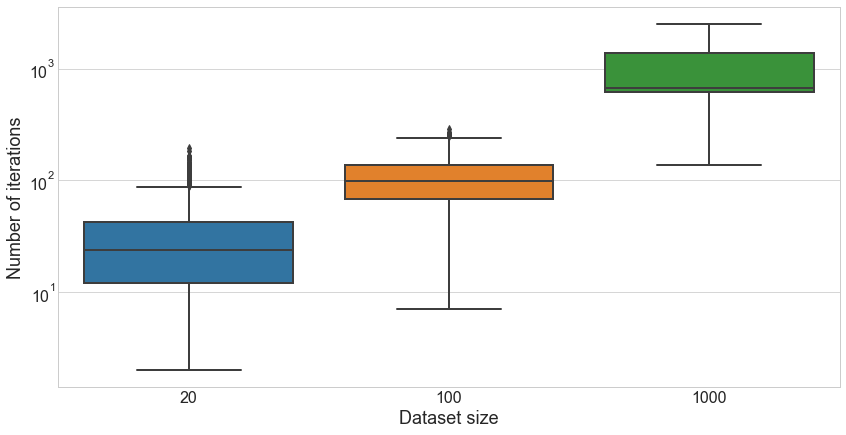

In [20]:
plt.figure();
sns.boxplot(data=[iterations_20, iterations_100, iterations_1000]);
plt.xticks([0, 1, 2], ['20', '100', '1000']);
plt.xlabel('Dataset size');
plt.ylabel('Number of iterations');
plt.yscale('log');
plt.show()

### Discussion

By running the experiments in Section 1.3.2 multiple times it becomes clear that the number of iterations before convergence can vary greatly between different simulations on the same dataset. However, it seems that the number of iterations is generally within the same order of magnitude as the dataset size. This is confirmed by the statistical analysis in Section 1.3.3. Thus, larger datasets require more iterations before the PLA algorithm converges to its final hypothesis. This seems logical because more datapoints need to be checked by the algorithm to see if their classification by the current hypothesis is correct. 

We can see further in Section 1.3.2 that the PLA achieves to find a hypothesis that perfecly separates the training dataset. However, for the smaller datasets this hypothesis can still differ quite a lot from the true target function. This can be explained by the fact that the PLA algorithm stops when it has found a hypothesis that correctly classifies all of the training data points. It has no way of knowing how far it is still removed from the true target function if no additional training data is provided. This is because the solutions of a PLA simulation appear stochastically at each iteration and are only tested against the provided training data. However, in general there are an infinite number of correct classifiers for a given training set and the PLA has no way of knowing which one is the true target function. For larger training datasets, it is clear that the PLA hypothesis better approximates the target function. This is a consequence of the *Hoeffding inequality* which states that for larger datasets, the difference between in-sample and out-sample errors becomes smaller, meaning that the target function is better approximated. 

## 1.4 PLA on a 10-dimensional linearly separable dataset

This section corresponds to parts (f) and (g) of Problem 1.4.

### 1.4.1 Creating the dataset
A random dataset of 1000 10-dimensional input vectors ($\textbf{x}_n \in {\rm I\!R}^{10}$) and their associated outputs is created and then used to apply the PLA on. The line that separates the dataset can be expressed as:

$$ x_{10} = a_1x_1 + a_2x_2 + \cdots + a_9x_9 + c $$
where $a_1, a_2, \cdots, a_9$ and $c$ are constants. To create the dataset, the constants are randomly generated to obtain a hyperplane in 10-dimensional space. Random datapoints are then generated and classified according to their relative position to this hyperplane.

In [12]:
# creating a 10-dimensional dataset of size 1000
N = 1000
d = 10

# the target function: a straight line in 10 dimensional space that separates the data in 2 classes
a = np.random.randint(-9, 10, d)  # 10 random constants between -9 and 9
t = lambda x: a[:-1]@x + a[-1]     # lambda function that describes the line as t = x10 = a1x1 + ... + a9x9 + c

# generate dataset
while True:
    # Generate 1000 random input vectors X, stored in a 1000*10 array
    X_10d = np.random.uniform(0, 1, [N, d])
    
    # Calculate outputs Y from each X based on target function, stored in a N*1 array
    Y_10d = np.empty(N)
        
    for i in range(N):
        x = X_10d[i, :-1]
        x10 = X_10d[i, -1]
        Y_10d[i] = np.sign(x10 - t(x))
    
    # Check if there are both positive and negative outputs
    pos = np.argwhere(Y_10d > 0)
    neg = np.argwhere(Y_10d < 0)
    if len(pos) and len(neg):
        break

In [13]:
print(X_10d.shape)
print(Y_10d.shape)

(1000, 10)
(1000,)


### 1.4.2 Running the PLA

In [14]:
%%time
w, iters, _ = pla(X_10d, Y_10d)
print('Weights:\n', w)
print()
print('Number of iterations:', iters)
print()

Weights:
 [ 24.         -41.78785564 -34.87921434   6.6470509   47.75574917
  34.86058293  17.95509482  23.78255088 -23.28011387 -36.33484608
   5.18208179]

Number of iterations: 4498

CPU times: user 193 ms, sys: 37.9 ms, total: 231 ms
Wall time: 212 ms


The number of iterations required for the algorithm to converge to a final hypothesis can vary greatly between different simulations (observable when running the code cell above multiple times). However, they are all in the order of $10^3$.

### 1.4.3 Time to convergence

To study the number of iterations before convergence of the PLA on the 10-dimensional dataset, the `pla_convergence()` function (defined above) is used. This function runs 1000 simulations of the PLA on a given dataset and then returns an array containing the number of iterations each experiment took to converge. This data is then used to create a histogram.

**WARNING:** the code below can take some time to run (up to **5 minutes **)

In [15]:
%%time
iterations_10d = pla_convergence(X_10d, Y_10d)

CPU times: user 3min 17s, sys: 35.6 s, total: 3min 53s
Wall time: 3min 35s


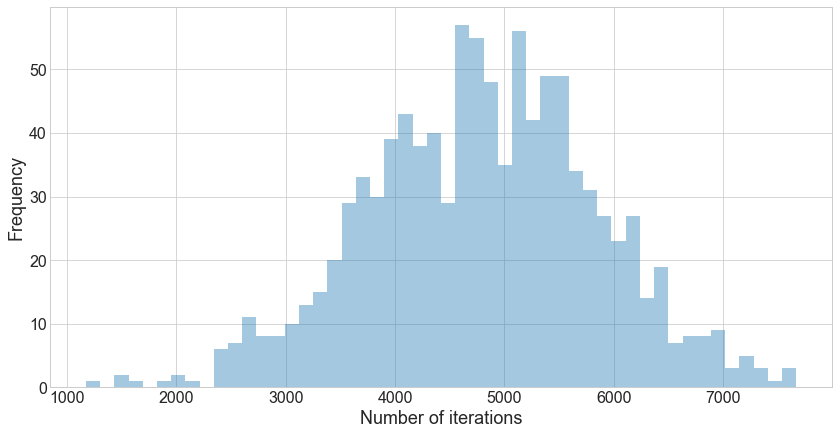

In [16]:
plt.figure();
sns.distplot(iterations_10d, bins=50, kde=False, norm_hist=False);
plt.xlabel('Number of iterations');
plt.ylabel('Frequency');
plt.show()

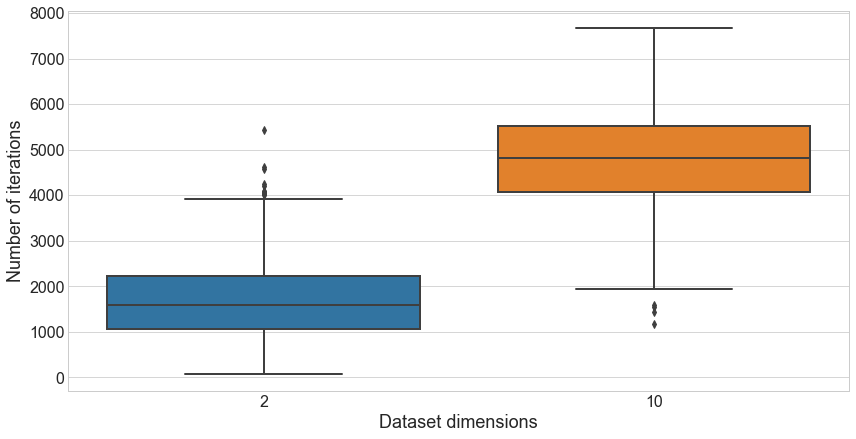

In [17]:
plt.figure();
sns.boxplot(data=[iterations_1000, iterations_10d]);
plt.xticks([0, 1], ['2', '10']);
plt.xlabel('Dataset dimensions');
plt.ylabel('Number of iterations');
plt.show()

### Discussion

Even for a 10-dimensional dataset, the PLA succeeds in finding a correct hypothesis, as long as it is linearly separable. However, the number of iterations required for convergence is higher than for a 2-dimensional dataset of the same size. There also seems to be more variability in the number of iterations between different simulations for the higher-dimensional dataset. This could be explained by the fact that for higher dimensions more weights need to be learned by the PLA. For a 2-dimensional set, only 3 weights need to be learned ($x_0$, $x_1$ and $x_2$) while for a 10-dimensional set this number increases to 11. Because each hypothesis consists of a combination of certain values for each weight, the number of possible hypotheses would be larger for higher dimensions and the PLA will generally take longer to find a correct one.

## 1.5 CONCLUSIONS

The PLA algorithm was described and tested on various linearly separable datasets of varying size and dimesnsionality. In each case, the algorithm succeeded in learning a hypothesis that correctly separates the data. However, it is not guaranteed that this is the true target function of the data. The solutions generated by the PLA merely appear stochastically and if one classifies all training points correctly, it is reported as the final solution. It was also observed that larger dataset sizes and higher dimensions require more iterations for the algorithm to converge. This is in line with expectations.

# 2. Problems 3.1 - 3.3: Non-linearly separable data and Linear Regression

In this second part, the PLA behavior is further analyzed, in particular for the case of non-linearly separable datasets, and the algorithm is expanded with the *Pocket* version. Next, the *Linear Regression* algorithm is introduced, another popular method to learn linear classifiers and which can also be used to approximate non-linear target functions. Finally, a technique called *polynomial feature transform* is used together with the pocket PLA and Linear Regression algorithms, which allows to find non-linear solutions with these linear methods.

The datasets used for these experiments are based on the *semi-circle* dataset described in the textbook and the `make_moons()` function from the *scikit-learn* Python library. These datasets consist of two semi-circles, representing the two classes of data, which are positioned so that th edge of the lower semi-circle is aligned with the center of the upper semi-circle.

## 2.1 Generating the semi-circle datasets

Problems 3.1, 3.2 and 3.3 from the textbook consider semi-circle toy datasets to apply the learning algorithms to. The *scikit-learn datasets* package contains a function that allows to create such a dataset (__[sklearn.datasets.make_moons()](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)__). However, it does not allow to modify the seperation between the two semi-circles. Therefore, the original code from the *scikit-learn* function is adapted below to allow this functionality.

The source code for the *scikit-learn* function is available here: https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/datasets/samples_generator.py#L639

The way the semi-circle datasets are defined here differs somewhat from the definitions used in the textbook (Problem 3.1). In this case, the $sep$ parameter characterizes the distance between the 'centers' of the two semi-circles, in stead of the edges (as in the book). The radius of each circle is set at $0.5$. Thus, a distance of $sep = 0$ corresponds to completely overlapping circles while values above $1$ correspond to semi-circles that are linearly separable. Furthermore, a small amount of noise is added when generating the dataset, so that there is a spread of the data points in a region around the the semi-circle. A visualization of these datasets for various values of $sep$ can be found below. 

In [18]:
# Adapted source code of the scikit-learn.datasets make_moons function

def make_moons(n_samples=100, sep=0.5, noise=None):
    """Make two interleaving half circles
    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    * n_samples : int, optional (default=100)
        The total number of points generated.
    * sep : float, optional (default=0.5)
        Separation of the two semi-circles, quantified as the vertical distance between the centers.
    * noise : float or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    
    Returns
    -------
    * X : array of shape [n_samples, 2]
        The generated samples.
    * y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    """

    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out))
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out))
    inner_circ_x = 1 - np.cos(np.linspace(0, np.pi, n_samples_in))
    inner_circ_y = 1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - sep

    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([-np.ones(n_samples_out, dtype=np.intp),
                   np.ones(n_samples_in, dtype=np.intp)])
    
    if noise is not None:
        X += np.random.normal(scale=noise, size=X.shape)

    return X, y

In [19]:
sep_list = np.linspace(0.2, 2, 10)

In [20]:
X_list = []
y_list = []
for sep in sep_list:
    X, y = make_moons(2000, sep=sep,  noise=0.05)
    X_list.append(X)
    y_list.append(y)

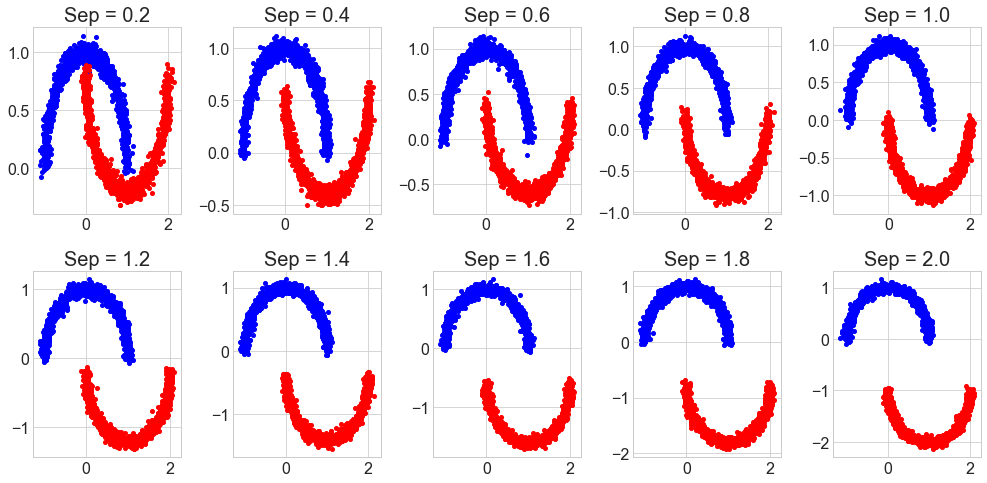

In [21]:
fig, axes = plt.subplots(figsize=(14,7), nrows=2, ncols=5, squeeze=False)

for X, y, ax, sep in zip(X_list, y_list, axes.reshape(-1), sep_list):    
    neg = np.argwhere(y<0)
    pos = np.argwhere(y>0)
    ax.plot(X[neg,0], X[neg,1] , marker='.', linestyle='none', color='b', label='y = -1');
    ax.plot(X[pos, 0], X[pos, 1], marker='.', linestyle='none', color='r', label='y = 1');
    ax.set_title('Sep = %.1f' %sep)
    
plt.tight_layout()
plt.show()

## 2.2 Applying PLA to semi-circle datasets

This section corresponds to Problem 3.2 from the textbook, although the range of *sep* values has been changed here (because of the different definition of this parameter). The PLA is applied to each dataset. However, in order to prevent the algorithm becoming stuck in an infinite loop for the non-linearly separable datasets, an iteration limit has been incorporated. After 10.000 iterations the algorithm will stop even when it has not found a solution.

Sep = 0.2
PLA did not converge after 10000 iterations
Iterations: 10000

Sep = 0.4
PLA did not converge after 10000 iterations
Iterations: 10000

Sep = 0.6
PLA did not converge after 10000 iterations
Iterations: 10000

Sep = 0.8
PLA did not converge after 10000 iterations
Iterations: 10000

Sep = 1.0
PLA did not converge after 10000 iterations
Iterations: 10000

Sep = 1.2
Iterations: 41

Sep = 1.4
Iterations: 22

Sep = 1.6
Iterations: 7

Sep = 1.8
Iterations: 3

Sep = 2.0
Iterations: 3



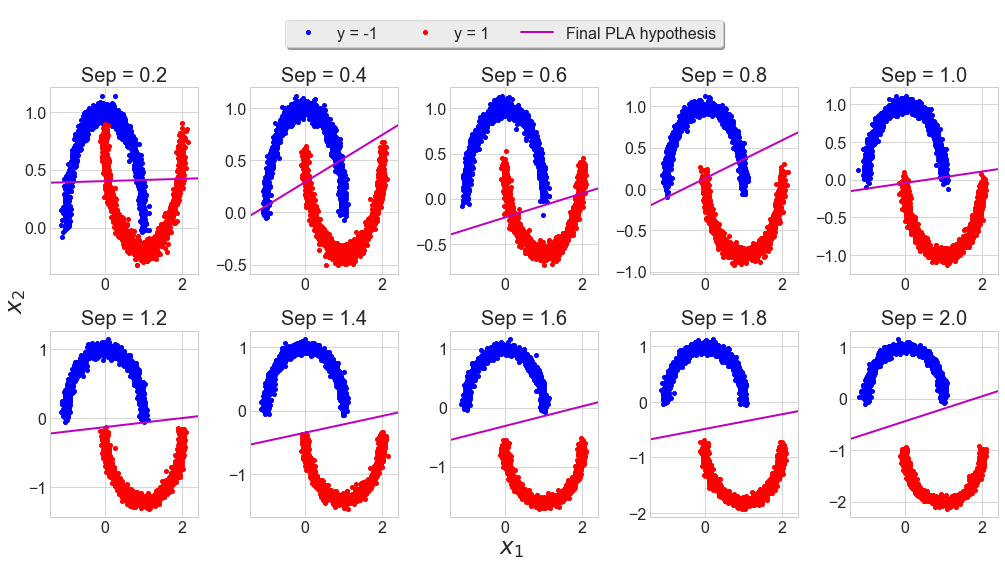

In [22]:
limit = 10000  # limit for the number of iterations for the PLA

fig, axes = plt.subplots(figsize=(14,7), nrows=2, ncols=5, squeeze=False)

for X, y, ax, sep in zip(X_list, y_list, axes.reshape(-1), sep_list):
    print('Sep = %.1f' %(sep))
    w, iters, _ = pla(X, y, max_iters=limit)
    print('Iterations: %s' %(iters))
    print()
    # plot the dataset
    neg = np.argwhere(y<0)
    pos = np.argwhere(y>0)
    ax.plot(X[neg,0], X[neg,1] , marker='.', linestyle='none', color='b', label='y = -1');
    ax.plot(X[pos, 0], X[pos, 1], marker='.', linestyle='none', color='r', label='y = 1');
    ax.set_title('Sep = %.1f' %sep)
    # plot the PLA hypothesis
    g = lambda x: -(w[1]/w[2])*x - (w[0]/w[2])
    x = np.linspace(-1.5, 2.5, 2)
    ax.plot(x, g(x), 'm-', label='Final PLA hypothesis');
    ax.set_xlim(-1.4, 2.4);

handles, labels = ax.get_legend_handles_labels()
fig.text(0.5, 0, r"$x_1$", ha='center', fontsize='x-large');
fig.text(0, 0.5, r"$x_2$", va='center', rotation='vertical', fontsize='x-large');
plt.figlegend(handles, labels, frameon=True, shadow=True, fancybox=True, 
              loc='upper center', ncol=3, bbox_to_anchor=[0.5, 1.1], prop={'size': 16});
plt.tight_layout()
plt.show()

### Plotting $sep$ *vs.* number of iterations

The $sep$ parameter is varied in the range between $1.2$ and $6$ for 50 values to create different *semi-circle* datasets. The number of iterations PLA takes to converge for each dataset is recorded.

In [23]:
seps = []
iters = []

for sep in np.linspace(1.2, 6, 50):
    X, y = make_moons(2000, sep=sep,  noise=0.05)
    _, i, _ = pla(X, y)
    seps.append(sep)
    iters.append(i)

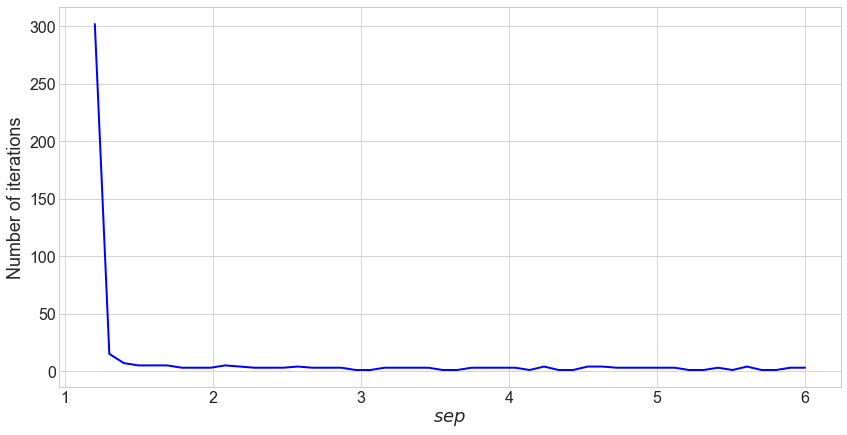

In [24]:
plt.plot(seps, iters, 'b-');
plt.xlabel(r'$sep$');
plt.ylabel('Number of iterations');
plt.show()

### Discussion

In this section, the PLA algorithm was applied to semi-circle datasets. For values of the $sep$ parameter equal to or below $1$, the data becomes non-linearly separable. In this case, the PLA would run infinitely because it can only generate linear hypotheses that will never correctly classify all of the data points. Therefore, an iteration limit was incorporated and the algorithm is halted manually when this limit is exceeded. The last hypothesis generated before the manual halt is reported as the PLA "solution" and used in the plots above. It is indeed clear that in these cases, the PLA is unable to find a suitable hypothesis. 

For $sep$ values above 1, the datasets become linearly separable and the PLA succeeds to find a solution. From the *Number of iterations vs. sep* plot, it can be seen that the number of iterations strongly decreases with higher $sep$ values, i.e. the PLA finds the solution faster when the two data classes are further separated. When there is a larger space between the two groups of data, there is a wider range of optimal weights dat can separate the data. Therefore, the PLA algorithm will need less iterations to find one of these optimal solutions for large $sep$ values.

## 2.3 The PLA pocket algorithm

This section corresponds to parts (a), (b) and (c) from Problem 3.3.

The code below describes the **PLA pocket algorithm**. This is an extension to the PLA that keeps track of the best weight vector it has encountered so far and only updates it when a better weight vector is obtained from the PLA update rule. The "best" weight vector is defined as the one with the lowest in-sample error $E_{in}$. At each iteration the pocket algorithm thus needs to calculate the $E_{in}$ of the current weight vector over the entire training data set. Because of this, the pocket algorithm is much slower than the original PLA. 

The PLA pocket algorithm will be run for a given number of iterations, after which it will automatically stop running and report the best weights vector it has encountered as its final solution. This is where it differs from the original PLA, where the final solution was just the final set of weights generated. The pocket PLA can therefore be applied to non-linearly separable data and still obtain a relatively good estimate of the target function.

In [25]:
def pla_pocket(training_in, training_out, max_iters):
    '''
    Pocket expansion of the PLA.
    
    Parameters:
    -----------
        * training_in : numpy array, contains the input vectors of the training dataset
        * training_out : numpy array, contains the outputs associated with the corresponding input vectors
        * max_iters : int, the maximum number of iterations that the algorithm will run
    
    Returns:
    --------
        * best_w : numpy array, vector containing the best weights of the pocket PLA
        * errors : numpy array, contains the in-sample errors (E_in) from each iteration
        * best_E_in : integer, in-sample error corresponding to the best hypothesis
        * best_errors : numpy array, vector containing the best E_in from each iteration
    '''
    training_in = np.array(training_in)
    training_out = np.array(training_out)
    
    assert np.shape(training_in)[0] == np.shape(training_out)[0], \
            "Training input and output have incompatible dimensions."
    
    # Introduce the x0 dimension (x0 = 1), store all input vectors in a N*d matrix
    X_matrix = np.hstack((np.ones((len(training_in), 1)), training_in))
    
    # Initialize d-dimensional weights vector to 0 and its corresponding in-sample error (E_in)
    w = np.zeros(np.shape(X_matrix)[1])
    predictions = np.sign(X_matrix@w)   # predictions according to the current weight vector
    E_in = np.sum(predictions != training_out) / len(training_out)
    
    # Initialize the best (pocket) weight vector and the current best E_in
    best_w = w
    best_E_in = E_in
    
    errors = [E_in]              # list storing the PLA errors from each iteration
    pocket_errors = [best_E_in]  # list storing the pocket error at each iteration
    
    for t in range(1, max_iters):
        # check if their are still misclassified points (otherwise no need to update w)
        if any(predictions != training_out):
            misclassified = np.argwhere(predictions != training_out)   # indexes of misclassified data (N*1 array)
            i = misclassified[np.random.randint(len(misclassified)), 0]  # choose a random index
            yn = training_out[i]
            xn = X_matrix[i]
            w = w + yn*xn                       # update weights vector
        
            predictions = np.sign(X_matrix@w)   # new predictions
            E_in = np.sum(predictions != training_out) / len(training_out)  # in-sample error of current weights
            errors.append(E_in)
            
            # check if new weights perform better than the best weights so far
            if E_in < best_E_in:
                best_w = w
                best_E_in = E_in
                
            pocket_errors.append(best_E_in)
        
    return best_w, np.array(errors), best_E_in, np.array(pocket_errors)

Applying the pocket PLA algorithm on a *semi-circle* dataset with $sep = 0.5$.

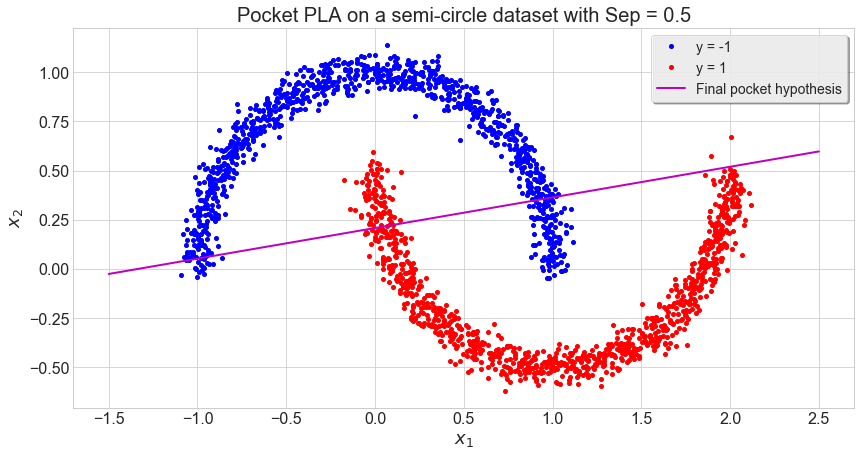

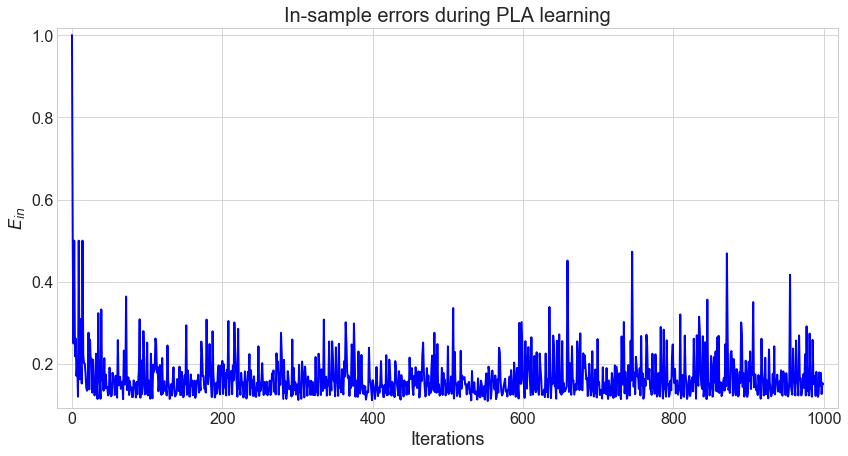

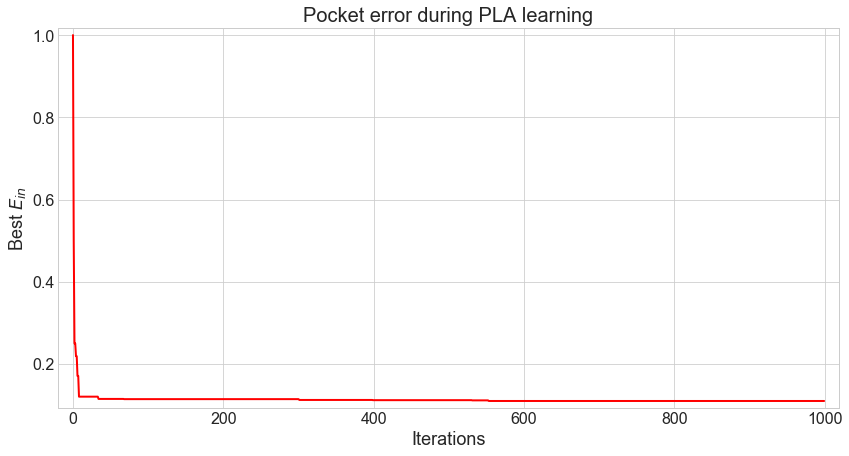

In [26]:
T = 1000  # max number of iterations

sep_0p5 = make_moons(2000, sep=0.5,  noise=0.05)
X, y = sep_0p5
pocket_w, errors, pocket_E_in, pocket_errors = pla_pocket(X, y, T)


# plotting the data with the final pocket hypothesis and the evolution of the in-sample errors.
plt.figure()
neg = np.argwhere(y<0)
pos = np.argwhere(y>0)
plt.plot(X[neg,0], X[neg,1] , marker='.', linestyle='none', color='b', label='y = -1');
plt.plot(X[pos, 0], X[pos, 1], marker='.', linestyle='none', color='r', label='y = 1');
# plot the PLA hypothesis
g = lambda x: -(pocket_w[1]/pocket_w[2])*x - (pocket_w[0]/pocket_w[2])
x = np.linspace(-1.5, 2.5, 2)
plt.plot(x, g(x), 'm-', label='Final pocket hypothesis');
plt.title('Pocket PLA on a semi-circle dataset with Sep = 0.5')
plt.xlabel(r'$x_1$');
plt.ylabel(r'$x_2$');
plt.legend(frameon=True, shadow=True, fancybox=True, loc='upper right');

# plotting the PLA errors vs iteration number
plt.figure()
plt.plot(np.arange(T), errors, 'b');
plt.title('In-sample errors during PLA learning');
plt.xlabel('Iterations');
plt.ylabel(r'$E_{in}$');
plt.margins(0.02)

# plotting the pocket errors vs iteration number
plt.figure()
plt.plot(np.arange(T), pocket_errors, 'r');
plt.title('Pocket error during PLA learning');
plt.xlabel('Iterations');
plt.ylabel(r'Best $E_{in}$');
plt.margins(0.02)

plt.show()

In [27]:
print('Final Pocket PLA error:', pocket_E_in)

Final Pocket PLA error: 0.11


### Discussion

The pocket PLA algorithm was applied to a non-linearly separable dataset, the final solution corresponds to the best weights vector it encountered over 1000 iterations. It can be seen that its solution indeed corresponds to a good linear approximation of the target function, whereas the original PLA would have kept running infinitely or returned a random solution that it encountered last when it is manually halted. 

In the second graph, the evolution of the in-sample error $E_{in}$ over the iterations is plotted. This figure clearly shows the unstable nature of the PLA method. At each iteration, the PLA takes one misclassified point and improves the weights so that this point is correctly classified, but this potentially messes up the classification of other points. Therefore, the $E_{in}$ does not gradually decrease, as would be desired when trying to learn a target function. In stead, it keeps fluctuating until the algorithm is halted. In the last figure, the pocket $E_{in}$ value is plotted. The advantage of the pocket PLA is that it will report the solution corresponding to the lowest error ($0.11$ in this case), while the original PLA would just report the last error encountered, which is clearly not guaranteed to be the lowest. This makes the pocket PLA a suitable method for approximating a non-linear classification problem with a linear classifier.

## 2.4 Linear Regression

This section corresponds to part (d) from Problem 3.3.

*Linear Regression* is another method that can be used to learn a linear classifier. It generally applies to real-valued continuous target functions, but it can easily be adapted to work on a binary classification problem as well. The hypothesis set is basically the same as for the PLA method, consisting of a set of weights vectors that associated with the data attributes. It can be represented as follows:

$$ h(\textbf{X}) = \sum\limits_{i=0}^d w_ix_i = \textbf{w}^T \textbf{X} $$

where $\textbf{X}$ is the matrix containing the input vectors $x_i$ and $\textbf{w}$ is the weights vector that forms the hypothesis.

In contrast to the PLA and many ohter learning algorithms, the Linear Regression algorithm learns the optimal weights vector with an analytical formula, in stead of iteratively searching for a solution. In essence, Linear Regression minimizes the in-sample error $\textbf{w}_{\text{lin}} = \text{argmin}_{\textbf{w}} E_{in}(\textbf{w})$ by requiring that the gradient of $E_{in}(\textbf{w})$ in function of $\textbf{w}$ is zero, i.e. $\nabla E_{in}(\textbf{w}) = 0$. Using matrix calculus (for details, see the textbook), this leads to the following formula in terms of the input matrix $\textbf{X}$:

$$ \textbf{w}_{\text{lin}} = \textbf{X}^\dagger \textbf{y} $$

where $\textbf{X}^\dagger = \left(\textbf{X}^T \textbf{X}\right)^{-1} \textbf{X}^T$ is the *pseudo-inverse* of $\textbf{X}$ and $\textbf{y}$ is the target value vector, containing the correct classifications of the input data.

Thus, the Linear Regression algorithms consists of calculating the *pseudo-inverse* of the input data matrix and using this to calculate the weights vector. This solution will then automatically correspond to the minimal in-sample error $E_{in}$ obtainable by linear regression. 

In [28]:
def lin_regress(training_in, training_out):
    '''
    The linear regression algorithm.
    
    Parameters:
    -----------
        * training_in : numpy array, contains the input vectors of the training dataset
        * training_out : numpy array, contains the outputs associated with the corresponding input vectors
        
    Returns:
    --------
        * w_lin : numpy array, weights vector obtained by linear regression
    '''
    training_in = np.array(training_in)
    training_out = np.array(training_out)
    
    assert np.shape(training_in)[0] == np.shape(training_out)[0], \
            "Training input and output have incompatible dimensions."
    
    # Introduce the x0 dimension (x0 = 1), store all input vectors in a N*d matrix
    X = np.matrix(np.hstack((np.ones((len(training_in), 1)), training_in)))
    
    y = training_out
    
    # Compute the pseudo-inverse of X
    pseudo_inv = (X.T*X).I * X.T
    
    w_lin = np.array(pseudo_inv @ y)
    predictions = np.sign(w_lin@X.T)   # predictions based on the learned weights
    E_in = np.sum(predictions != training_out) / len(training_out)  # in-sample error of the predictions     
    
    return w_lin.reshape(-1), E_in

### 2.4.1 Linear regression on non-linear data

Applying the **Linear regression algorithm** to the same dataset as in Section 2.3. The solution of the Linear Regression algorithm is plotted together with the training dataset and the Pocket PLA solution obtained previously.

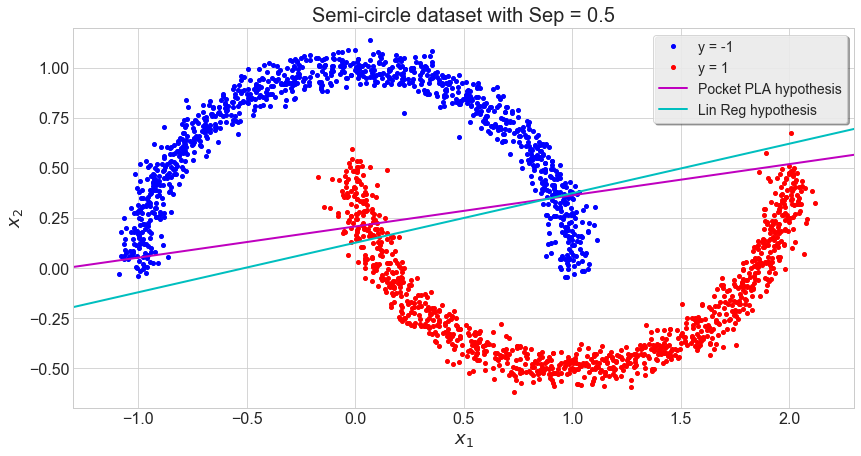

In [29]:
X, y = sep_0p5
w_lin, lin_E_in = lin_regress(X, y)

# plotting the dataset, pocket and lin regress hypotheses all together
plt.figure()
neg = np.argwhere(y<0)
pos = np.argwhere(y>0)
plt.plot(X[neg,0], X[neg,1] , marker='.', linestyle='none', color='b', label='y = -1');
plt.plot(X[pos, 0], X[pos, 1], marker='.', linestyle='none', color='r', label='y = 1');

# plot the pocket PLA hypothesis
g = lambda x: -(pocket_w[1]/pocket_w[2])*x - (pocket_w[0]/pocket_w[2])
x = np.linspace(-1.5, 2.5, 2)
plt.plot(x, g(x), 'm-', label='Pocket PLA hypothesis');

# plot the lin regress hypothesis
h = lambda x: -(w_lin[1]/w_lin[2])*x - (w_lin[0]/w_lin[2])
plt.plot(x, h(x), 'c-', label='Lin Reg hypothesis');

plt.title('Semi-circle dataset with Sep = 0.5')
plt.xlabel(r'$x_1$');
plt.ylabel(r'$x_2$');
plt.xlim(-1.3, 2.3);
plt.ylim(-0.7, 1.2);
plt.legend(frameon=True, shadow=True, fancybox=True, loc='upper right');

### 2.4.2 Statistical analysis of computation times and in-sample errors

The Linear Regression and pocket PLA algorithms are compared in terms of computation times and solution quality. For this, each algorithm is run 100 times on the same dataset, while measuring the computation times and recording the in-sample errors ($E_{in}$) of each simulation. These are then used to make a statistical comparison.

**Warning:** the code below can take quite a long time to run (~**10 min**)

In [30]:
%%time
# statistical analysis of computation times and in-sample errors for pocket algorithm and linear regression
pocket_times = []
pocket_errors = []
lin_times = []
lin_errors = []

T = 100000  # max number of iterations for pocket PLA (from Problem 3.3)

# use semi-circle dataset with sep = 0.5
X, y = sep_0p5

# perform 100 simulations of both algorithms and store comp times and errors
for _ in range(100):
    pocket_start = time.time()               # start time for pocket algorithm
    _, _, pocket_E_in, _ = pla_pocket(X, y, T)
    pocket_end = time.time()                 # end time for pocket algorithm
    pocket_time = pocket_end - pocket_start
    
    lin_start = time.time()                  # start time for linear regression
    _, lin_E_in = lin_regress(X, y)
    lin_end = time.time()                    # end time for linear regression
    lin_time = lin_end - lin_start
    
    pocket_times.append(pocket_time)
    pocket_errors.append(pocket_E_in)
    lin_times.append(lin_time)
    lin_errors.append(lin_E_in)

CPU times: user 9min 7s, sys: 2.39 s, total: 9min 10s
Wall time: 9min 19s


The average computation times and in-sample errors for both algorithms are reported below in bar charts for comparison. The standard deviation is used to draw error bars.

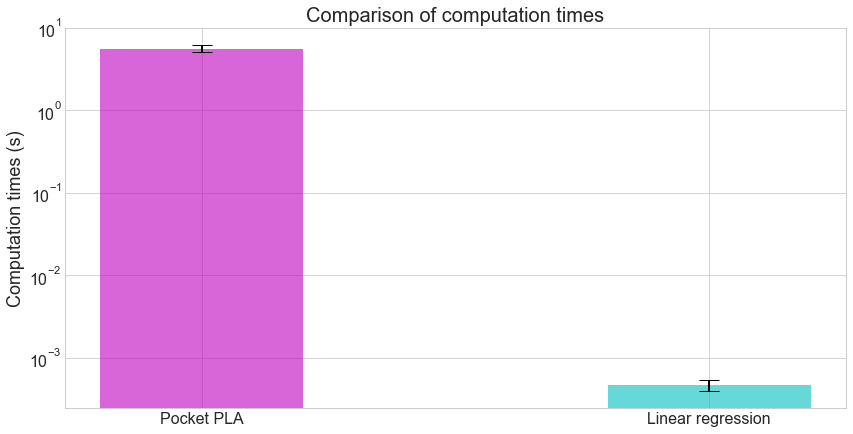

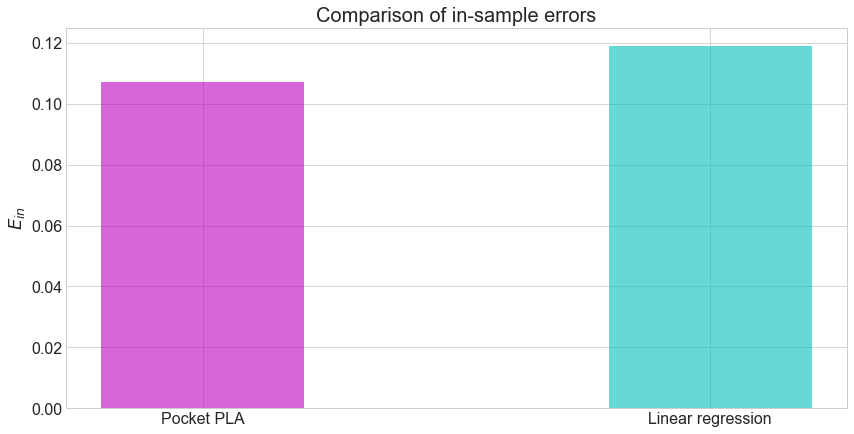

In [31]:
# boxplots of computation times and in-sample errors
plt.figure()
plt.bar(left=[0], height=[np.mean(pocket_times)], width=0.4, color = 'm', alpha=0.6, 
        yerr=np.std(pocket_times), capsize=10);
plt.bar(left=[1], height=[np.mean(lin_times)], width=0.4, color = 'c', alpha=0.6, 
        yerr=np.std(lin_times), capsize=10);
plt.yscale('log');
plt.title('Comparison of computation times');
plt.xticks([0, 1], ['Pocket PLA', 'Linear regression']);
plt.ylabel('Computation times (s)');

plt.figure()
plt.bar(left=[0], height=[np.mean(pocket_errors)], width=0.4, color = 'm', alpha=0.6);
plt.bar(left=[1], height=[np.mean(lin_errors)], width=0.4, color = 'c', alpha=0.6);
#plt.yscale('log');
plt.title('Comparison of in-sample errors');
plt.xticks([0, 1], ['Pocket PLA', 'Linear regression']);
plt.ylabel(r'$E_{in}$');
plt.show()

### Discussion

The Linear Regression algorithm was applied to the same semi-circle dataset as for the pocket PLA (Section 2.3). A solution is obtained that closely resembles that of the pocket PLA experiment. Thus, despite consisting of a single, relatively simple, analytical calculation, the Linear Regression algorithm still manages to find a good solution to the non-linear classification problem. From the statistical analysis it is obvious that Linear Regression is much faster than the pocket PLA. It does not require a large amount of iterations but only a single matrix calculation to produce its solution and therefore is significantly faster. The $E_{in}$ is slightly worse than for PLA but nearly equivalent. This makes Linear Regression an attractive method even for non-linear classification problems as it can efficiently produce a good estimate of the weights. A useful application of Linear Regression is to generate a set of *initial weights* that can then be further used as the starting point for another learning algorithm. For example, one could apply the pocket PLA using as initial weights the result of the Linear Regression algorithm, which would allow the PLA to converge faster to an optimal solution.

## 2.5 A third-order polynomial feature transform

Up until now, we have only succeeded in learning hypotheses that separate the data in a linear manner. However, what makes methods like PLA and Linear Regression linear is not necessarily the linearity in the input data $\textbf{x}$ but linearity in the weights $\textbf{w}$. In the learning algorithms, the values of $\textbf{x}$ are merely constants. This implies that one could perform any kind of transformation on $\textbf{x}$ to a higher dimension and still being able to learn a set of corresponding weights using one of the linear models. This is the principle of *polynomial feature transform*. For example, the 2-dimensional semi-circle dataset considered thus far could be transformed using a third-order polynomial:

$$ \textbf{z} = \phi_3(\textbf{x}) = (1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3) $$

This results in a new set of 10-dimensional vectors $\textbf{z}$ that can be fed as input to one of the linear models. As already shown in Section 1.4, the PLA has no problem with managing data of this dimension, and neither thus Linear Regression. These methods can thus be used to learn a set of weights $\textbf{w} = (w_0, w_1, ..., w_9)$ that correctly classify the transformed data. By 'inversely transforming' this classification back to the X-space, a solution is obtained for classifying the non-linear data.

This method is implemented below and then combined with both the pocket PLA and Linear Regression algorithm to find a non-linear solution for the semi-circle dataset with $sep = 0.5$.

In [32]:
def third_order_transform(data):
    '''Applies a third-order polynomial feature transform to 2-dimensional data.'''
    x1 = data[:, [0]]
    x2 = data[:, [1]]
    
    # the introduction of the x0 (or z0) dimension already happens in the PLA implementation and is therefore
    # omitted here
    #z0 = np.ones((len(data), 1))
    
    z1 = x1
    z2 = x2
    z3 = x1**2
    z4 = x1 * x2
    z5 = x2**2
    z6 = x1**3
    z7 = x1**2 * x2
    z8 = x1 * x2**2
    z9 = x2**3
    
    Z = np.hstack((z1, z2, z3, z4, z5, z6, z7, z8, z9))
    
    return Z

Applying the pocket PLA algorithm on the transformed data.

In [33]:
X, y = sep_0p5
Z = third_order_transform(X)

T = 100000  # max number of iterations (from Problem 3.3)
trans_pocket_w, trans_errors, trans_best_E_in, _ = pla_pocket(Z, y, T)

In [34]:
trans_best_E_in

0.0

Applying the Linear regression algorithm on the transformed data

In [35]:
X, y = sep_0p5
Z = third_order_transform(X)

trans_w_lin, trans_lin_E_in = lin_regress(Z, y)

In [36]:
trans_lin_E_in

0.0

In [37]:
# equation for the third order polynomial
eq = lambda x1, x2, a: a[0] + a[1]*x1 + a[2]*x2 + a[3]*x1**2 + a[4]*x1*x2 + a[5]*x2**2 + a[6]*x1**3 + \
                        a[7]*x1**2*x2 + a[8]*x1*x2**2 + a[9]*x2**3

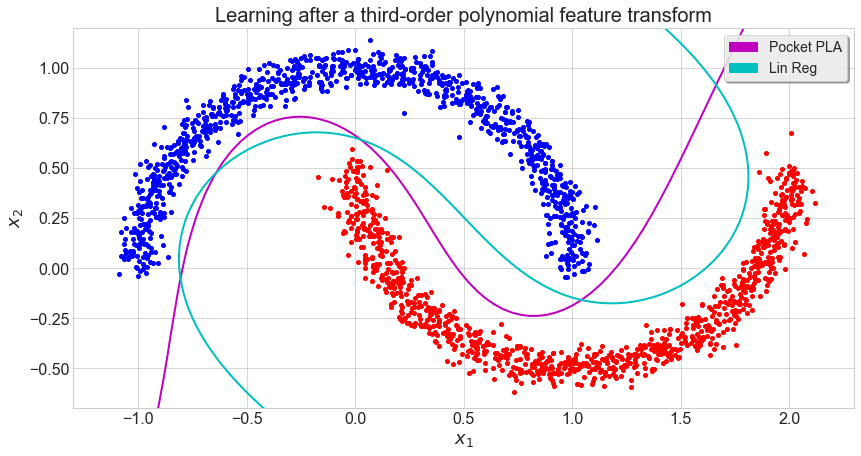

In [38]:
X, y = sep_0p5

# plotting the data with the final pocket hypothesis and the evolution of the in-sample errors.
plt.figure()
neg = np.argwhere(y<0)
pos = np.argwhere(y>0)
neg_plot = plt.plot(X[neg,0], X[neg,1] , marker='.', linestyle='none', color='b', label='y = -1');
pos_plot = plt.plot(X[pos, 0], X[pos, 1], marker='.', linestyle='none', color='r', label='y = 1');

# plot the third-order transformed PLA hypothesis
x1, x2 = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1.5, 2.5, 100))
F = eq(x1, x2, trans_pocket_w)
pla_CS = plt.contour(x1, x2, F, [0], colors = 'm', linestyles = 'solid')
pla_patch = mpatches.Patch(color='m', label = 'Pocket PLA')

# plot the third-order transformed Linear Regression hypothesis
G = eq(x1, x2, trans_w_lin)
lin_reg_CS = plt.contour(x1, x2, G, [0], colors = 'c', linestyles = 'solid')
lin_reg_patch = mpatches.Patch(color='c', label='Lin Reg')

plt.title('Learning after a third-order polynomial feature transform')
plt.xlabel(r'$x_1$');
plt.ylabel(r'$x_2$');
plt.xlim(-1.3, 2.3);
plt.ylim(-0.7, 1.2);
plt.legend((pla_patch, lin_reg_patch), ('Pocket PLA', 'Lin Reg'), 
           frameon=True, shadow=True, fancybox=True, loc='upper right');
plt.show()

### Discussion

The pocket PLA and Linear Regression algorithms were performed on the semi-circle dataset after first transforming it with a third-order polynomial feature transform. Both algorithms succeeded in learning a non-linear solution, represented by a 10-dimensional weights vector that linearly classifies the data in the Z-space. Both methods now correctly classify all points in the non-linear dataset. Thus, using the trick of non-linear transformation, the relatively simple linear models can be used to find more complex non-linear solutions.

## 2.6 CONCLUSIONS

With these experiments, the power of linear models has been demonstrated. Due to their efficiency and simplicity, they are a good starting point for any learning problem. Even when encountered with a non-linearly separable dataset, one can use the method of non-linear transformation to still find a good solution using a linear model. However, caution should be taken when using non-linear transformation, because it can quickly lead to exaggerated complexity. The third-order polynomial transform on the semi-circle dataset already increased the dimensions from 2 to 10. This subsequently also leads to an increased $VC$ dimension and can cause generalization problems. Therefore, it is sometimes better to stick with a simple linear classifier and accepting a small $E_{in}$ than trying to find a solution that correctly classifies all of the training data but might lead to *overfitting*.